__OVERSTIMULATION BEHAVIOR ANALYSIS__

__Project Definition & Preliminary Analysis__

_Project Definition_

__Title__: Overstimulation Behavior and Lifestyle Analysis

__Objective__: Utilizing the "overstimulation_dataset.csv", this projects aims to analyze how various lifestyle factors influence overstimulation behaviors. The goal is to identify patterns and correlations that can informa strategies for managing overstimulation.

__Key Research Questions__:
1. Which lifestyle factors are most strongly associated with overstimulation behaviours?
2. Are there identifiable patterns or trends in overstimulation incidents across different demographics?
3. Is overstimulation a risk factor for depression? 
4. Can we develop a predictive model to anticipate overstimulation episodes based on lifestyle data?
5. Can recommendations be made for daily habits and lifestyle hygiene that can minimize the risk of overstimulation and improve an individual's mental health?
6. Is there a correlation between excessive stress and overstimulation and symptoms of depression?

__Dataset Overview__:

Source: Overstimulation Behavior and Lifestyle Dataset from Kaggle (https://www.kaggle.com/datasets/miadul/overstimulation-behavior-and-lifestyle-dataset/data)

File: "overstimulation_dataset.csv"

Features:
1. Demographics
- Age: Age of the individual (18-60)
2. Lifestyle & Daily Routine
- Sleep_Hours: Hours of sleep per day (3-10)
- Screen_Time: Screen time per day (1-12)
- Work_Hours: Hours worked per day (4-15)
- Exercise_Hours: Hours of physical activity per day(0-3)
- Caffeine_Intake: Number of cups of caffeinated drinks(0-5)
- Tech_Usage_Hours: Total hours spent using technology per day (1-10)
3. Environmental Exposure
- Noise_Exposure: Frequency of exposure to high noise (0-5)
- Social_Interaction: Number of daily social interactions (0-10)
4. Mental Health & Psychological Traits
- Stress_Level: Self-reported stress level (1=low stress, 10=high stress)
- Anxiety_Score: Anxiety score (1-10)
- Depression_Score: Depression score (1-10)
- Overthinking_Score: Tendency to overthink (1-10)
- Irritability_Score: Irritability (1-10)
- Sensory_Sensitivity: Sensitivity to sensory input(0 = low sensitivity, 4 = high sensitivity)
- Headache_Frequency: Headaches per week
5. Habits & Coping Mechanisms
- Multitasking_Habit: Whether the person tends to multitask (1 = Yes, 0 = No)
- Meditation_Habit: Whether the person practices meditation/mindfulness (1 = Yes, 0 = No)
- Sleep_Quality: Quality of sleep (1-4)
6. Target Variable
- Overstimulated: 1 = Yes, 0 = No

__Expected Outcomes__:

* Identification of key factors contributing to overstimulation
* Clustering of individuals based on overstimulation response patterns
* Preliminary predictive model to identify potential overstimulation

_Preliminary Analysis_

1. Data Exploration

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [28]:
data = pd.read_csv('overstimulation_dataset.csv')

In [29]:
data.head(5)

,Age,Sleep_Hours,Screen_Time,Stress_Level,Noise_Exposure,Social_Interaction,Work_Hours,Exercise_Hours,Caffeine_Intake,Multitasking_Habit,Anxiety_Score,Depression_Score,Sensory_Sensitivity,Meditation_Habit,Overthinking_Score,Irritability_Score,Headache_Frequency,Sleep_Quality,Tech_Usage_Hours,Overstimulated
0,56,7.767825,4.908517,2,0,8,11,2.054411,4,0,6,8,3,1,1,8,1,2,8.746524,0
1,46,4.270068,8.413936,9,4,4,10,2.513216,3,1,4,4,2,1,5,5,2,4,8.508448,1
2,32,6.676144,1.688213,5,2,8,12,2.123108,2,1,4,3,2,1,8,7,2,4,5.701592,0
3,25,7.963324,3.315576,7,2,8,13,1.217663,3,1,3,4,0,1,4,4,2,1,9.131087,0
4,38,3.748138,9.899260,5,0,5,4,0.093407,4,0,9,4,0,1,2,9,5,3,2.286433,1


In [9]:
data.shape

(2000, 20)

In [8]:
data.isnull().sum()

Age                    0
Sleep_Hours            0
Screen_Time            0
Stress_Level           0
Noise_Exposure         0
Social_Interaction     0
Work_Hours             0
Exercise_Hours         0
Caffeine_Intake        0
Multitasking_Habit     0
Anxiety_Score          0
Depression_Score       0
Sensory_Sensitivity    0
Meditation_Habit       0
Overthinking_Score     0
Irritability_Score     0
Headache_Frequency     0
Sleep_Quality          0
Tech_Usage_Hours       0
Overstimulated         0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2000 non-null   int64  
 1   Sleep_Hours          2000 non-null   float64
 2   Screen_Time          2000 non-null   float64
 3   Stress_Level         2000 non-null   int64  
 4   Noise_Exposure       2000 non-null   int64  
 5   Social_Interaction   2000 non-null   int64  
 6   Work_Hours           2000 non-null   int64  
 7   Exercise_Hours       2000 non-null   float64
 8   Caffeine_Intake      2000 non-null   int64  
 9   Multitasking_Habit   2000 non-null   int64  
 10  Anxiety_Score        2000 non-null   int64  
 11  Depression_Score     2000 non-null   int64  
 12  Sensory_Sensitivity  2000 non-null   int64  
 13  Meditation_Habit     2000 non-null   int64  
 14  Overthinking_Score   2000 non-null   int64  
 15  Irritability_Score   2000 non-null   i

2. Descriptive Statistics & Visualization

In [10]:
data.describe()

,Age,Sleep_Hours,Screen_Time,Stress_Level,Noise_Exposure,Social_Interaction,Work_Hours,Exercise_Hours,Caffeine_Intake,Multitasking_Habit,Anxiety_Score,Depression_Score,Sensory_Sensitivity,Meditation_Habit,Overthinking_Score,Irritability_Score,Headache_Frequency,Sleep_Quality,Tech_Usage_Hours,Overstimulated
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,38.700000,6.501131,6.403858,4.989500,2.050500,4.521000,8.920000,1.510789,1.961000,0.514500,4.909000,4.936500,2.062500,0.476500,5.034000,5.101500,2.994000,2.507500,5.536272,0.637500
std,12.070951,2.021518,3.143323,2.630371,1.431074,2.847738,3.141741,0.862808,1.429161,0.499915,2.585549,2.538442,1.441747,0.499572,2.555016,2.547831,2.014943,1.104334,2.559542,0.480842
min,18.000000,3.000081,1.000338,1.000000,0.000000,0.000000,4.000000,0.000356,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.014015,0.000000
25%,28.000000,4.763518,3.714882,3.000000,1.000000,2.000000,6.000000,0.760902,1.000000,0.000000,3.000000,3.000000,1.000000,0.000000,3.000000,3.000000,1.000000,2.000000,3.397449,0.000000
50%,39.000000,6.542349,6.311802,5.000000,2.000000,5.000000,9.000000,1.532074,2.000000,1.000000,5.000000,5.000000,2.000000,0.000000,5.000000,5.000000,3.000000,2.000000,5.530601,1.000000
75%,49.000000,8.240834,9.110644,7.000000,3.000000,7.000000,12.000000,2.245614,3.000000,1.000000,7.000000,7.000000,3.000000,1.000000,7.000000,7.000000,5.000000,3.000000,7.711026,1.000000
max,59.000000,9.992248,11.995135,9.000000,4.000000,9.000000,14.000000,2.999450,4.000000,1.000000,9.000000,9.000000,4.000000,1.000000,9.000000,9.000000,6.000000,4.000000,9.998554,1.000000


In [11]:
data.columns

Index(['Age', 'Sleep_Hours', 'Screen_Time', 'Stress_Level', 'Noise_Exposure',
       'Social_Interaction', 'Work_Hours', 'Exercise_Hours', 'Caffeine_Intake',
       'Multitasking_Habit', 'Anxiety_Score', 'Depression_Score',
       'Sensory_Sensitivity', 'Meditation_Habit', 'Overthinking_Score',
       'Irritability_Score', 'Headache_Frequency', 'Sleep_Quality',
       'Tech_Usage_Hours', 'Overstimulated'],
      dtype='object')

In [5]:
data['Overstimulated'].value_counts()

Overstimulated
1    1275
0     725
Name: count, dtype: int64

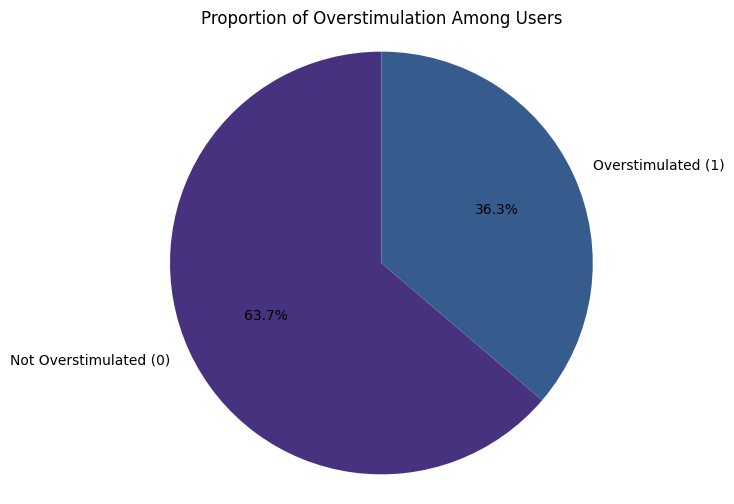

In [30]:
overstim_counts = data["Overstimulated"].value_counts()
labels = ['Not Overstimulated (0)', 'Overstimulated (1)']
plt.figure(figsize=(6, 6))
plt.pie(overstim_counts, labels=labels, autopct='%1.1f%%', colors=sns.color_palette("viridis"), startangle=90)
plt.title("Proportion of Overstimulation Among Users")
plt.axis('equal')
plt.show()

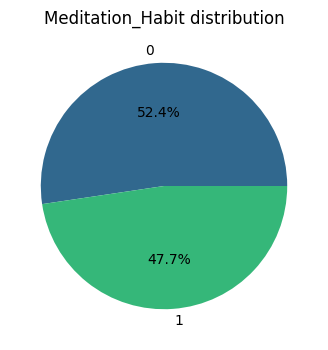

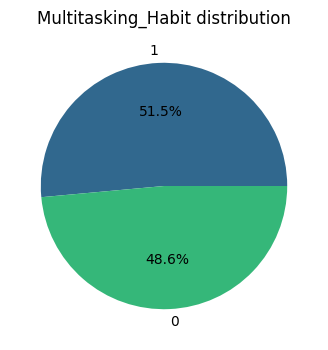

In [31]:
binary_cols = ['Meditation_Habit', 'Multitasking_Habit']
for col in binary_cols:
    plt.figure(figsize=(6,4))
    count = data[col].value_counts()
    plt.pie(count, labels=count.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(count)).as_hex())
    plt.title(f'{col} distribution')
    plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_17816\4150323142.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=col, data=data, palette='viridis', kde=True)


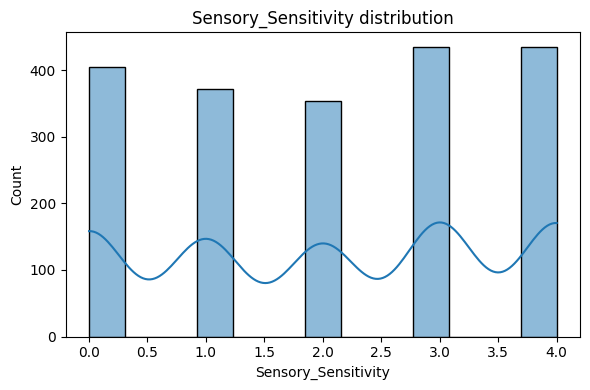

C:\Users\user\AppData\Local\Temp\ipykernel_17816\4150323142.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=col, data=data, palette='viridis', kde=True)


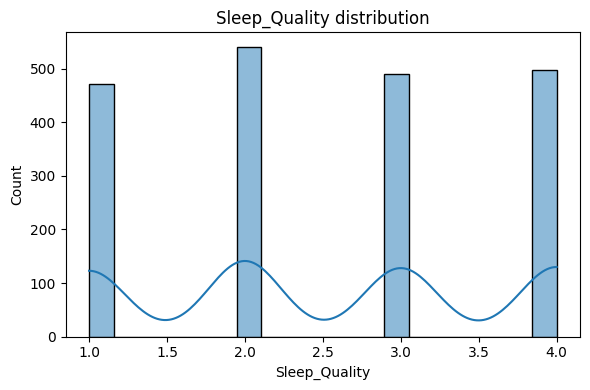

C:\Users\user\AppData\Local\Temp\ipykernel_17816\4150323142.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=col, data=data, palette='viridis', kde=True)


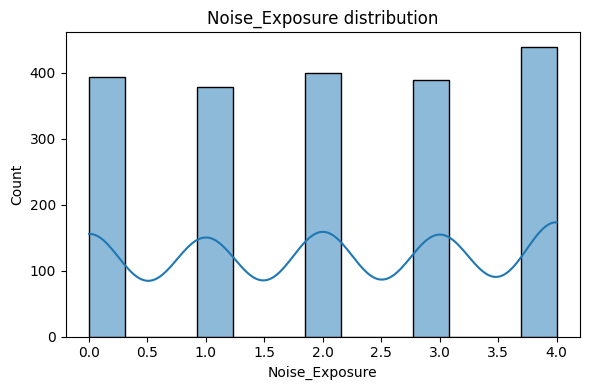

C:\Users\user\AppData\Local\Temp\ipykernel_17816\4150323142.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=col, data=data, palette='viridis', kde=True)


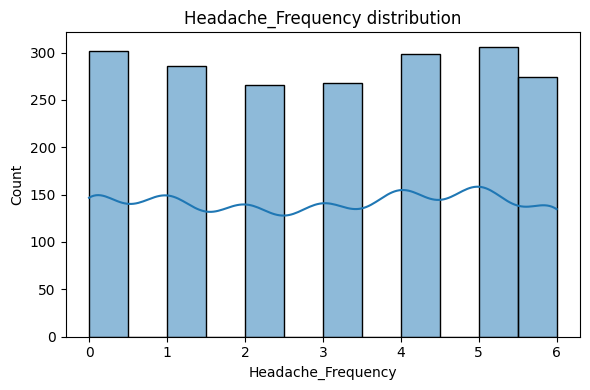

In [38]:
categorical_cols = ['Sensory_Sensitivity', 'Sleep_Quality', 'Noise_Exposure', 'Headache_Frequency']
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(x=col, data=data, palette='viridis', kde=True)
    plt.title(f'{col} distribution')
    plt.tight_layout()
    plt.show()

In [39]:
#sprawdzenie wartości unikalnych w zmiennych kategorycznych
categorical_cols = ['Meditation_Habit', 'Multitasking_Habit', 'Sensory_Sensitivity', 'Sleep_Quality', 'Noise_Exposure', 'Headache_Frequency']
for col in categorical_cols:
    print(f"{col}: {data[col].unique()}")

Meditation_Habit: [1 0]
Multitasking_Habit: [0 1]
Sensory_Sensitivity: [3 2 0 4 1]
Sleep_Quality: [2 4 1 3]
Noise_Exposure: [0 4 2 3 1]
Headache_Frequency: [1 2 5 0 4 6 3]


In [11]:
# upewnienie się czy wszystkie wskazane kolumny kategoryczne są typu int
data['Multitasking_Habit'] = data['Multitasking_Habit'].astype(int)     # binarne
data['Meditation_Habit'] = data['Meditation_Habit'].astype(int)         # binarne
data['Sensory_Sensitivity'] = data['Sensory_Sensitivity'].astype(int)
data['Sleep_Quality'] = data['Sleep_Quality'].astype(int)
data['Noise_Exposure'] = data['Noise_Exposure'].astype(int)
data['Headache_Frequency'] = data['Headache_Frequency'].astype(int)

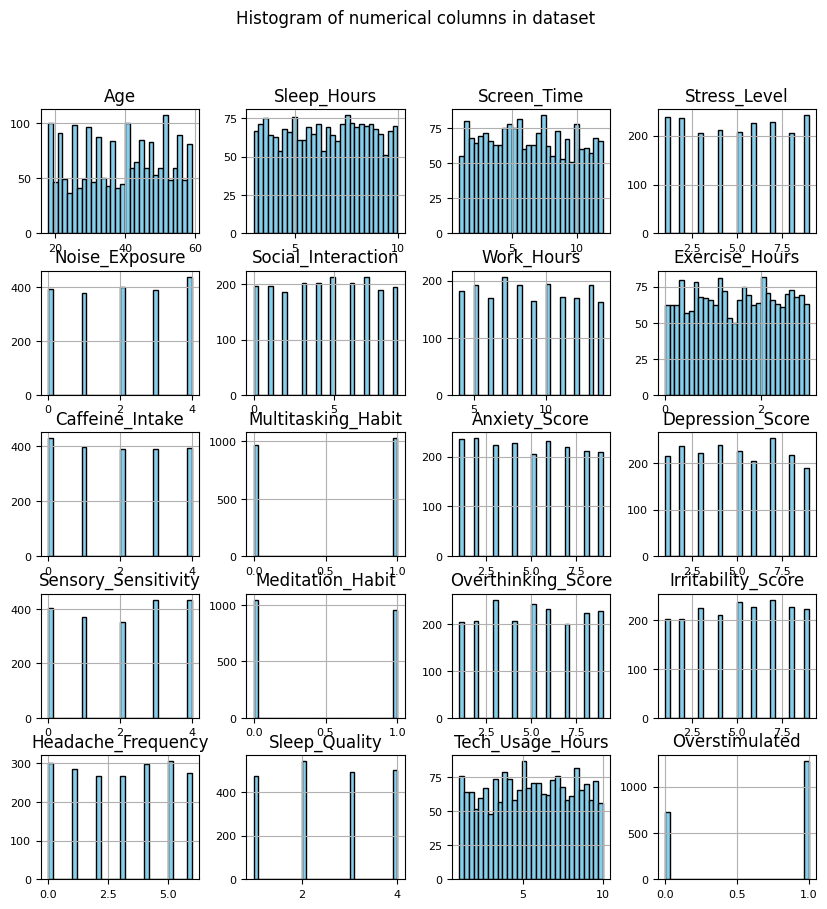

In [16]:
data.hist(figsize=(10,10), color='skyblue', bins=30, xlabelsize=8, ylabelsize=8, edgecolor='black')
plt.suptitle("Histogram of numerical columns in dataset")
plt.show()

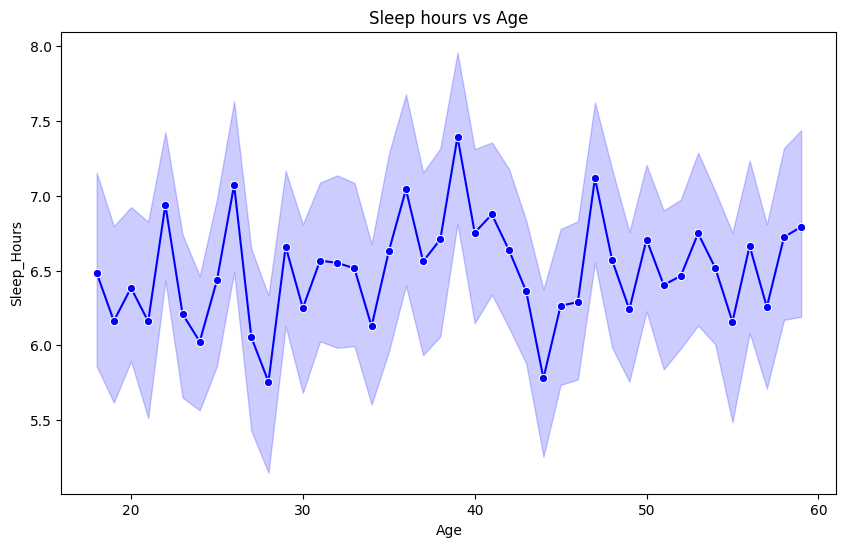

In [20]:
# Sleep hours vs Age
plt.figure(figsize=(10,6))
sns.lineplot(x='Age', y='Sleep_Hours', data=data, marker='o', color='blue')
plt.title('Sleep hours vs Age')
plt.show()

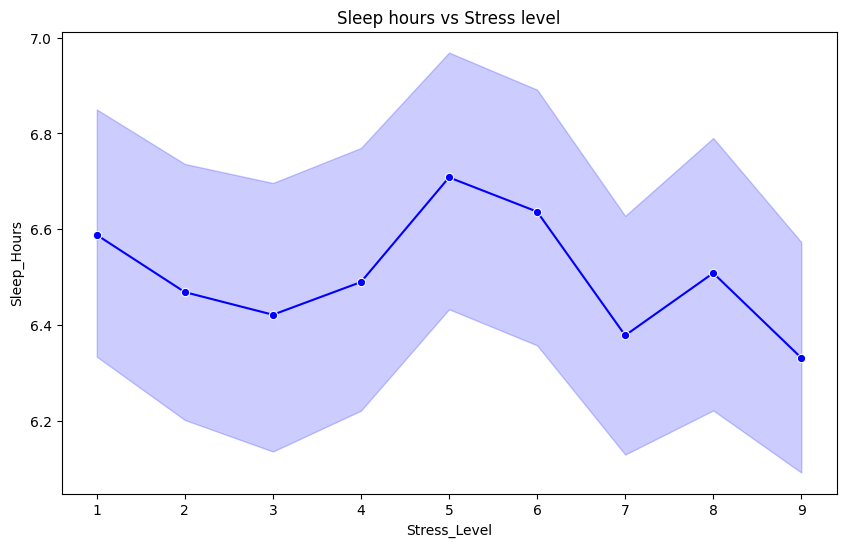

In [20]:
# Sleep hours vs Stress level
plt.figure(figsize=(10,6))
sns.lineplot(x='Stress_Level', y='Sleep_Hours', data=data, marker='o', color='blue')
plt.title('Sleep hours vs Stress level')
plt.show()

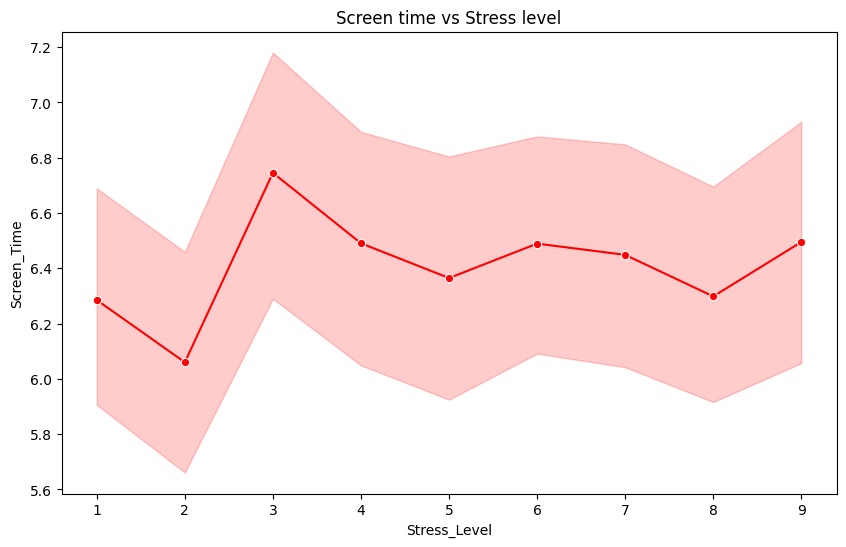

In [21]:
# Screen time vs Stress level
plt.figure(figsize=(10,6))
sns.lineplot(x='Stress_Level', y='Screen_Time', data=data, marker='o', color='red')
plt.title('Screen time vs Stress level')
plt.show()

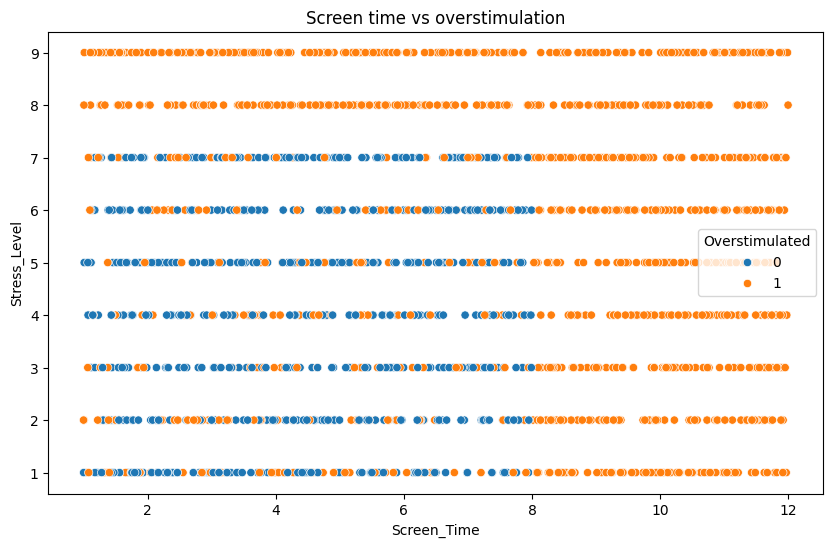

In [27]:
# Screen time vs overstimulation
plt.figure(figsize=(10,6))
sns.scatterplot(x='Screen_Time', y='Stress_Level', data=data, marker='o', hue='Overstimulated')
plt.title('Screen time vs overstimulation')
plt.show()

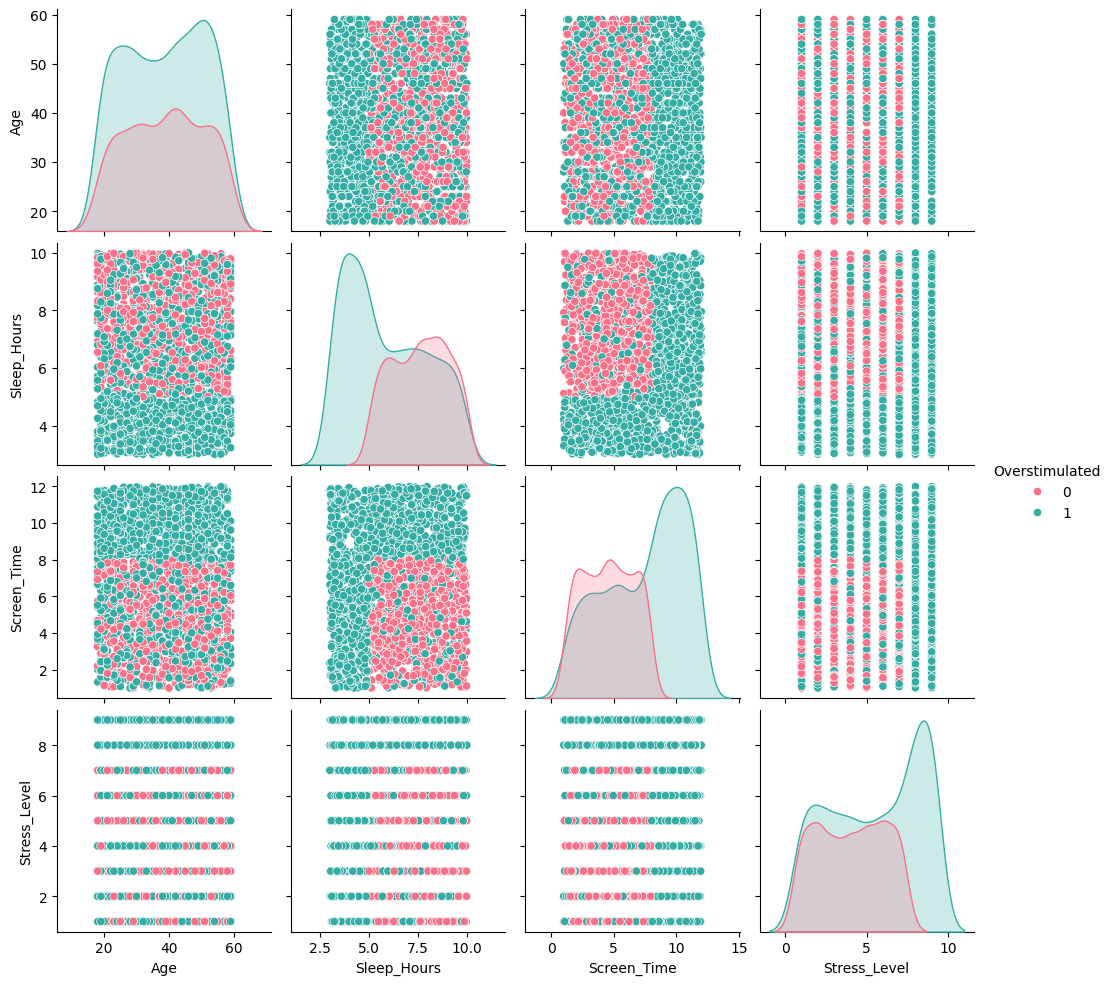

In [11]:
sns.pairplot(data[['Age', 'Sleep_Hours', 'Screen_Time', 'Stress_Level', 'Overstimulated']], hue='Overstimulated', palette='husl')
plt.show()

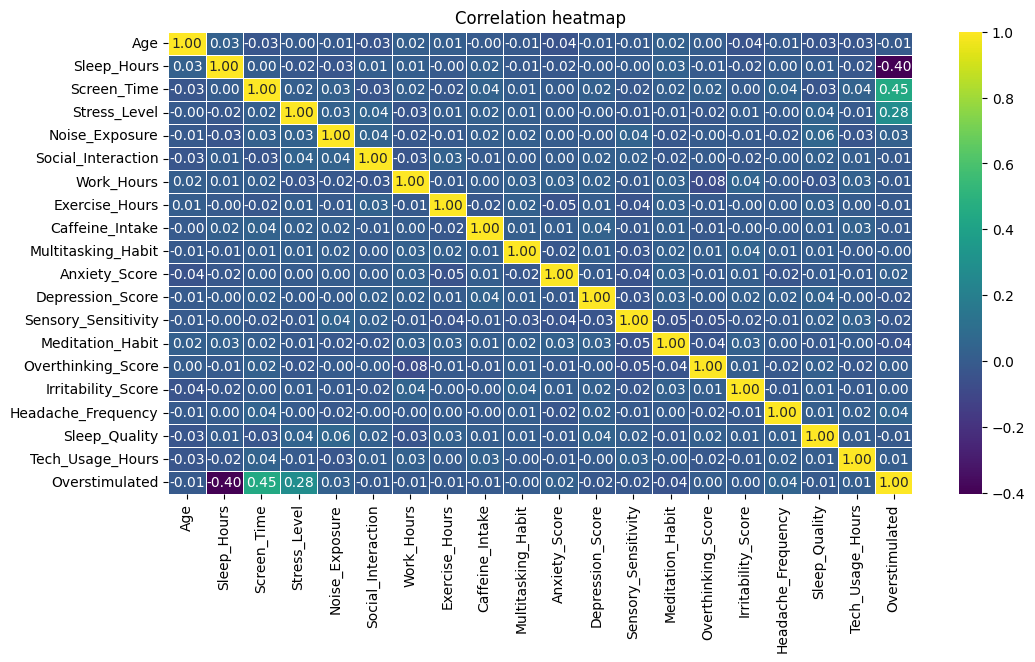

In [14]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(), annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Correlation heatmap')
plt.show()

In [21]:
# One-Hot Encoding dla kolumn niebinarnych
data = pd.get_dummies(data, columns=['Sensory_Sensitivity', 'Sleep_Quality', 
                                 'Noise_Exposure', 'Headache_Frequency'], drop_first=True)

In [22]:
# wyszukanie wszystkich kolumn typu bool
bool_cols = data.select_dtypes(include='bool').columns

# zamiana na int
data[bool_cols] = data[bool_cols].astype(int)
data.head()

,Age,Sleep_Hours,Screen_Time,Stress_Level,Social_Interaction,Work_Hours,Exercise_Hours,Caffeine_Intake,Multitasking_Habit,Anxiety_Score,...,Noise_Exposure_1,Noise_Exposure_2,Noise_Exposure_3,Noise_Exposure_4,Headache_Frequency_1,Headache_Frequency_2,Headache_Frequency_3,Headache_Frequency_4,Headache_Frequency_5,Headache_Frequency_6
0,56,7.767825,4.908517,2,8,11,2.054411,4,0,6,...,0,0,0,0,1,0,0,0,0,0
1,46,4.270068,8.413936,9,4,10,2.513216,3,1,4,...,0,0,0,1,0,1,0,0,0,0
2,32,6.676144,1.688213,5,8,12,2.123108,2,1,4,...,0,1,0,0,0,1,0,0,0,0
3,25,7.963324,3.315576,7,8,13,1.217663,3,1,3,...,0,1,0,0,0,1,0,0,0,0
4,38,3.748138,9.899260,5,5,4,0.093407,4,0,9,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
#data.describe()

,Age,Sleep_Hours,Screen_Time,Stress_Level,Social_Interaction,Work_Hours,Exercise_Hours,Caffeine_Intake,Multitasking_Habit,Anxiety_Score,...,Noise_Exposure_1,Noise_Exposure_2,Noise_Exposure_3,Noise_Exposure_4,Headache_Frequency_1,Headache_Frequency_2,Headache_Frequency_3,Headache_Frequency_4,Headache_Frequency_5,Headache_Frequency_6
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.0000,2000.000000,2000.000000,2000.00000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000
mean,38.700000,6.501131,6.403858,4.989500,4.521000,8.920000,1.510789,1.961000,0.514500,4.909000,...,0.189000,0.2000,0.194500,0.219500,0.14300,0.13300,0.134000,0.149000,0.153000,0.137000
std,12.070951,2.021518,3.143323,2.630371,2.847738,3.141741,0.862808,1.429161,0.499915,2.585549,...,0.391607,0.4001,0.395914,0.414011,0.35016,0.33966,0.340738,0.356178,0.360078,0.343933
min,18.000000,3.000081,1.000338,1.000000,0.000000,4.000000,0.000356,0.000000,0.000000,1.000000,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,4.763518,3.714882,3.000000,2.000000,6.000000,0.760902,1.000000,0.000000,3.000000,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,6.542349,6.311802,5.000000,5.000000,9.000000,1.532074,2.000000,1.000000,5.000000,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,49.000000,8.240834,9.110644,7.000000,7.000000,12.000000,2.245614,3.000000,1.000000,7.000000,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
max,59.000000,9.992248,11.995135,9.000000,9.000000,14.000000,2.999450,4.000000,1.000000,9.000000,...,1.000000,1.0000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000


In [43]:
# One-Hot Encoding dla Age
labels = ['Young_Adults', 'Early_Adults', 'Mid_Adults', 'Older_Adults']
data['Age'] = pd.cut(data['Age'], bins=[18, 25, 35, 45, 60], labels=labels)
pd.get_dummies(data['Age'], drop_first=True).head()

TypeError: '<' not supported between instances of 'float' and 'str'

In [ ]:
#18-25 young adults
# 26-35 early adults
# 36-45 mid adults
# 46-60 older adults

3. Initial Insights & Hypotheses

* Do overstimulation levels correlate with specific environmental triggers (eg. high noise levels)?
* Can we detect clusters of individuals based on overstimulation score?

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [44]:
X = data.drop(columns=['Overstimulated'])  # Features
y = data['Overstimulated']  # Target variable